In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm

calendrier_challenge = pd.read_parquet("challenge_data/calendrier_challenge.parquet")
questionnaire = pd.read_parquet("challenge_data/questionnaire.parquet")
consos_challenge = pd.read_parquet("challenge_data/consos_challenge.parquet")
temperatures = pd.read_parquet("challenge_data/temperatures.parquet")

min_date = datetime.datetime(2009,7,15)
max_date=datetime.datetime(2011,1,1)
all_clients = list(set(consos_challenge["id_client"]))
day = datetime.datetime(2011,1,2)-datetime.datetime(2011,1,1)
n_days = (max_date-min_date).days-365
client_challenges = np.array(questionnaire[questionnaire["participe_challenge"]==True].id_client)
id_client = client_challenges[0]

In [7]:
print("Nombre de clients : ", len(all_clients))
print("date de début :",min_date)
print("date de fin :", max_date)
print("Clients challenge :", len(questionnaire[questionnaire['participe_challenge']]) )
print("Clients sans challenge :", len(questionnaire[questionnaire['participe_challenge']==False]) )

Nombre de clients :  615
date de début : 2009-07-15 00:00:00
date de fin : 2011-01-01 00:00:00
Clients challenge : 307
Clients sans challenge : 308


Visualisation du signal sur une semaine

C:\Users\paulc\AppData\Local\Temp\ipykernel_5248\850029634.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]


<Axes: xlabel='horodate'>

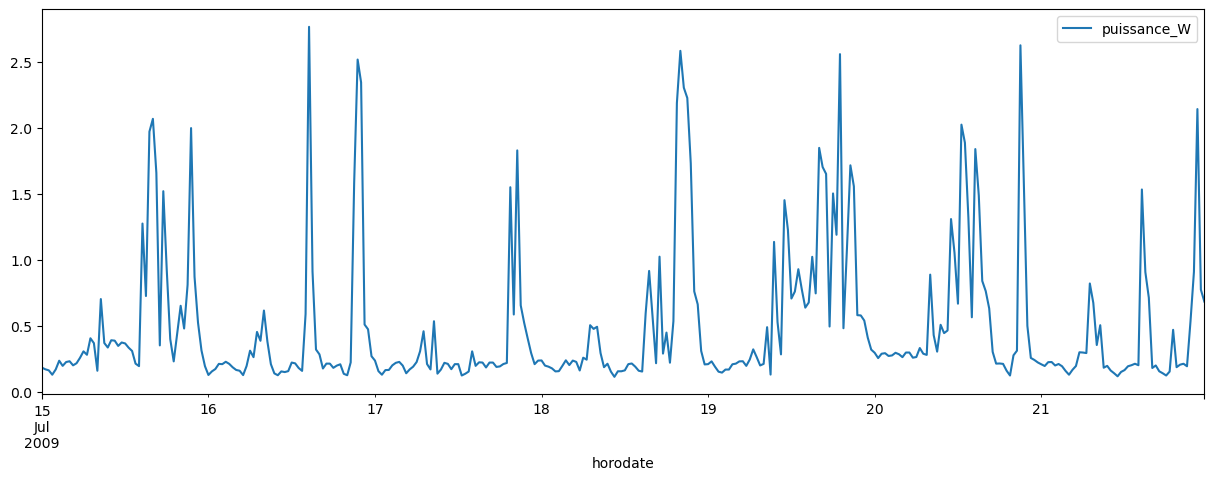

In [8]:
id_client2 = all_clients[1]
fig, ax = plt.subplots(figsize=(15,5))
signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
signal.plot(x='horodate',y='puissance_W',ax=ax)

#signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]
#signal2.plot(x='horodate',y='puissance_W',ax=ax)

Signal moyen pour un client

In [9]:
mean_signal=[]
mean_signal2=[]

def load_signal(id_client,min_time,max_time):

    data = consos_challenge[consos_challenge["id_client"]==id_client]
    data1 = data[data["horodate"]>min_time]
    return data1[data1["horodate"]<=max_time].puissance_W

for i in range(0,536):
    signal = load_signal(id_client,min_date+i*day,min_date+(i+1)*day)
    if len(signal)==48 and (i%7==3 or i%7==4):
        mean_signal.append(signal)


    elif len(signal)==48:
        mean_signal2.append(signal)

Text(0, 0.5, 'Puissance électrique moyenne')

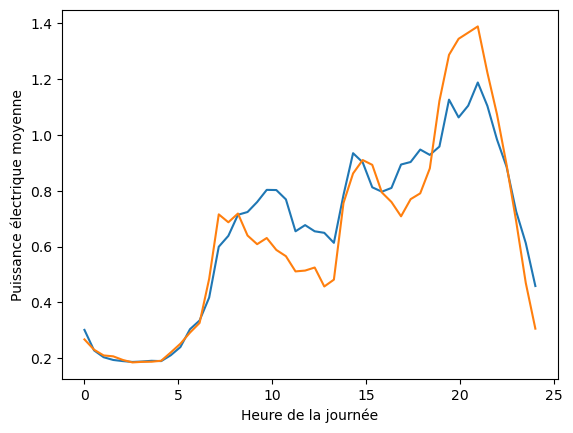

In [10]:
plt.plot(np.linspace(0,24,48),np.mean(mean_signal,axis=0))
plt.plot(np.linspace(0,24,48),np.mean(mean_signal2,axis=0))
plt.xlabel('Heure de la journée')
plt.ylabel('Puissance électrique moyenne')

Signal normalisée pour chaque client avec sa moyenne journalière

C:\Users\paulc\AppData\Local\Temp\ipykernel_5248\3123468675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
C:\Users\paulc\AppData\Local\Temp\ipykernel_5248\3123468675.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]


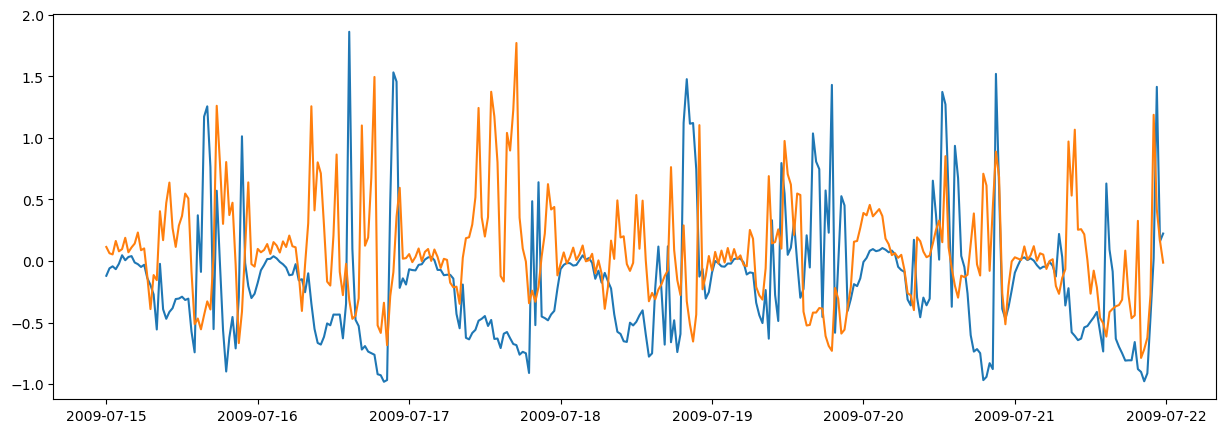

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
signal_normalized = signal.puissance_W-np.array(7*list(np.mean(mean_signal,axis=0)))
plt.plot(signal.horodate,signal_normalized)

signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]
signal_normalized2 = signal2.puissance_W-np.array(7*list(np.mean(mean_signal2,axis=0)))
plt.plot(signal.horodate,signal_normalized2)

Signal moyen sur une semaine pour tout les clients

In [12]:
mean_date = []
print(len(all_clients))
for client in all_clients:
    signal = load_signal(client,min_date+110*day,min_date+117*day)
    mean_date.append(signal)

615


Text(0, 0.5, 'Puissance moyenne')

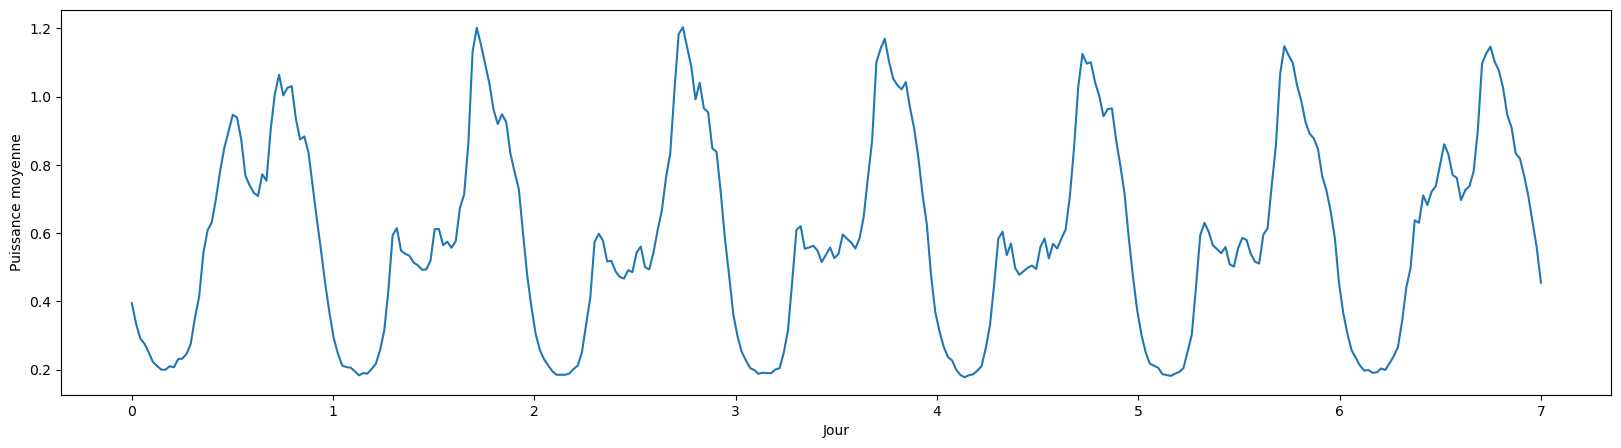

In [13]:
signaldate = np.mean(mean_date,axis=0)
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,7,7*48),signaldate)
plt.xlabel('Jour')
plt.ylabel('Puissance moyenne')

Variation par jour

1
2
3
4
5
6
7


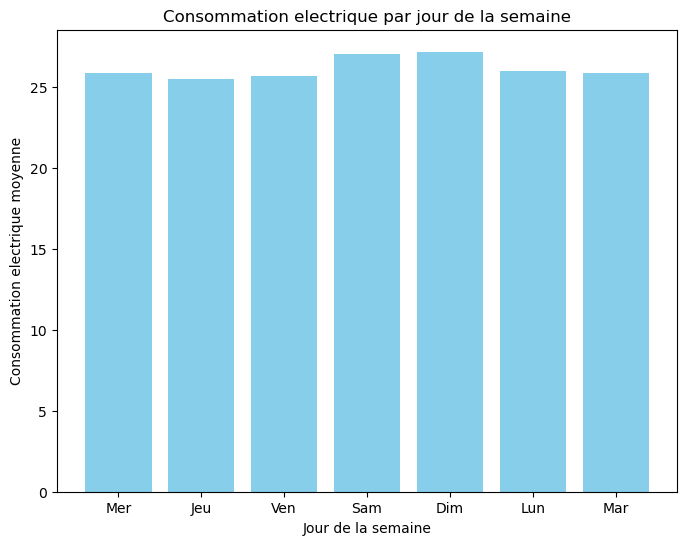

In [14]:
jours = ["Mer","Jeu","Ven","Sam","Dim","Lun","Mar"]
mean_counts = []
X = consos_challenge
for j in range(1, 8):
    mean_d=[]
    print(j)
    for i in range(52):
        X0 =X[X["horodate"]>(min_date+(7*i+j)*day)]
        mean_d.append(X0[X0["horodate"]<=(min_date+(7*i+j+1)*day)]['puissance_W'])
    mean_counts.append(np.mean(mean_d))

plt.figure(figsize=(8, 6))
plt.bar(jours, np.array(mean_counts)*48, color='skyblue')
plt.xlabel('Jour de la semaine')
plt.ylabel('Consommation electrique moyenne')
plt.title('Consommation electrique par jour de la semaine')
plt.show()

Variation saisonière

  0%|          | 0/365 [00:00<?, ?it/s]

100%|██████████| 365/365 [02:00<00:00,  3.03it/s]


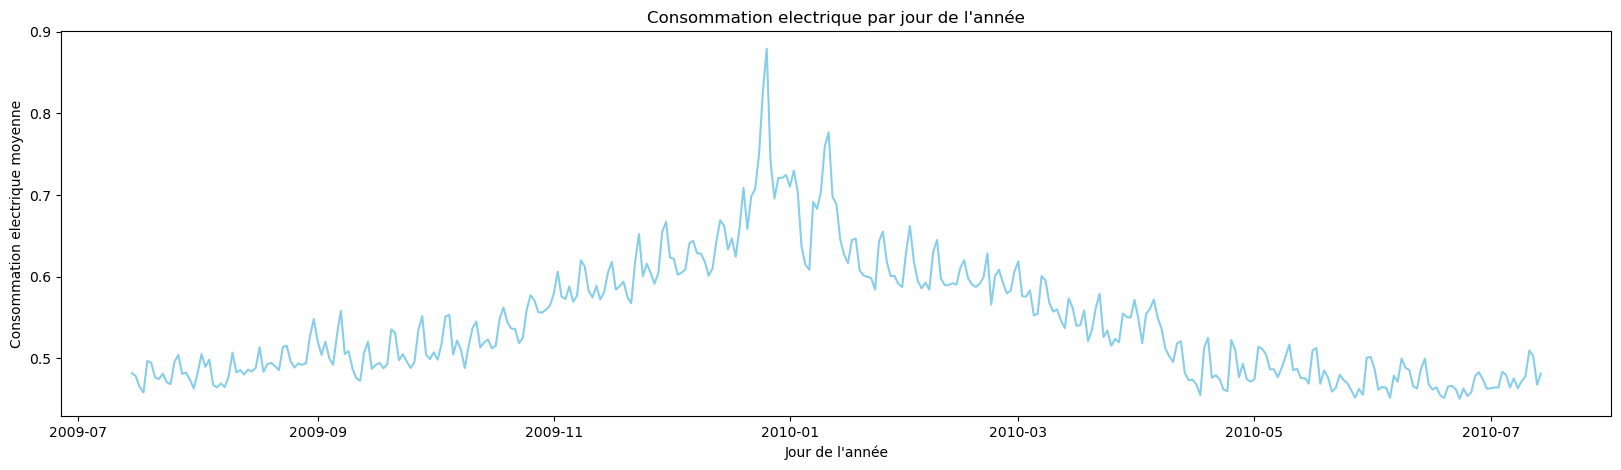

In [15]:
jours = [min_date+i*day for i in range(365)]
mean_electricity = []
X = consos_challenge
for i in tqdm(range(365)):
    X0 = X[X["horodate"]>(min_date+i*day)]
    X0 = X0[X0["horodate"]<=(min_date+(i+1)*day)]
    mean_electricity.append(np.mean([X0.puissance_W]))

plt.figure(figsize=(20, 5))
plt.plot(jours, mean_electricity, color='skyblue')
plt.xlabel("Jour de l'année")
plt.ylabel('Consommation electrique moyenne')
plt.title("Consommation electrique par jour de l'année")
plt.show()

# Prediction de références

### Evaluation des peformances

In [23]:
def MSE(s0,s1):
    return np.mean((s0-s1)**2)

index_1821 = 1.0*np.array([(i>=18*2)*(i<=21*2) for i in range(48)])
def MSE_1821(s0,s1):
    s0_reindex = s0.reshape(-1,48)*index_1821
    s1_reindex = s1.reshape(-1,48)*index_1821
    return MSE(s0_reindex,s1_reindex)*48/np.sum(index_1821)

index_813 = 1.0*np.array([(i>=8*2)*(i<=13*2) for i in range(48)])
def MSE_813(s0,s1):
    s0_reindex = s0.reshape(-1,48)*index_813
    s1_reindex = s1.reshape(-1,48)*index_813
    return MSE(s0_reindex,s1_reindex)*48/np.sum(index_813)

def MAE(s0,s1):
    return np.mean(np.abs(s0-s1))

index_1821 = 1.0*np.array([(i>=18*2)*(i<=21*2) for i in range(48)])
def MAE_1821(s0,s1):
    s0_reindex = s0.reshape(-1,48)*index_1821
    s1_reindex = s1.reshape(-1,48)*index_1821
    return MAE(s0_reindex,s1_reindex)*48/np.sum(index_1821)

index_813 = 1.0*np.array([(i>=8*2)*(i<=13*2) for i in range(48)])
def MAE_813(s0,s1):
    s0_reindex = s0.reshape(-1,48)*index_813
    s1_reindex = s1.reshape(-1,48)*index_813
    return MAE(s0_reindex,s1_reindex)*48/np.sum(index_813)
    

Prediction par modulo 365

100%|██████████| 307/307 [00:08<00:00, 35.52it/s]


0.729878455153891
1.334343900319056
0.9149421905133039


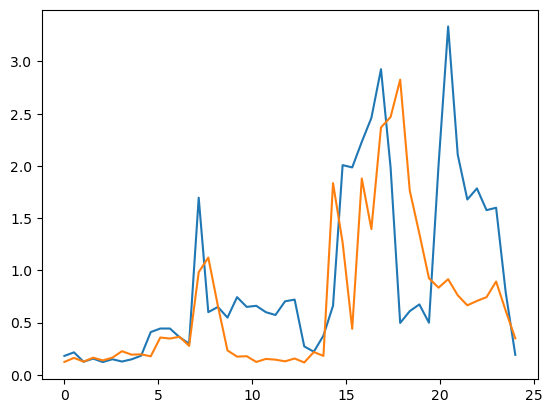

In [17]:
y_test = []
y_predict = []

for id in tqdm(client_challenges):
    y_test.append(np.array(load_signal(id_client,max_date-n_days*day,max_date)))
    y_predict.append(np.array(load_signal(id_client,max_date-(n_days+365)*day,max_date-365*day)))

y_test = np.array(y_test)
y_predict = np.array(y_predict)

print(MSE(y_test,y_predict))
print(MSE_1821(y_test,y_predict))
print(MSE_813(y_test,y_predict))


plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-31*day,max_date-30*day)))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(31+365)*day,max_date-(30+365)*day)))

Prediction à D-7

100%|██████████| 307/307 [00:08<00:00, 35.61it/s]


0.7708556556985561
1.3574569003105077
0.8973100909990982


Text(0, 0.5, 'puissance électrique consommée')

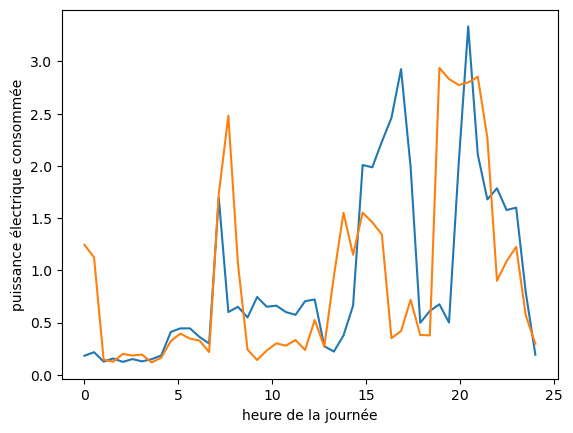

In [18]:
y_test = []
y_predict = []

for id in tqdm(client_challenges):
    y_test.append(np.array(load_signal(id_client,max_date-n_days*day,max_date)))
    y_predict.append(np.array(load_signal(id_client,max_date-(n_days+7)*day,max_date-7*day)))

y_test = np.array(y_test)
y_predict = np.array(y_predict)

print(MSE(y_test,y_predict))
print(MSE_1821(y_test,y_predict))
print(MSE_813(y_test,y_predict))


plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-31*day,max_date-30*day)))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(31+7)*day,max_date-(30+7)*day)))
plt.xlabel('heure de la journée')
plt.ylabel('puissance électrique consommée')

Prediction vis à vis de la veille

100%|██████████| 307/307 [00:08<00:00, 34.17it/s]


0.677768706139097
1.1917116179240064
0.7587461296165781


Text(0, 0.5, 'puissance électrique consommée')

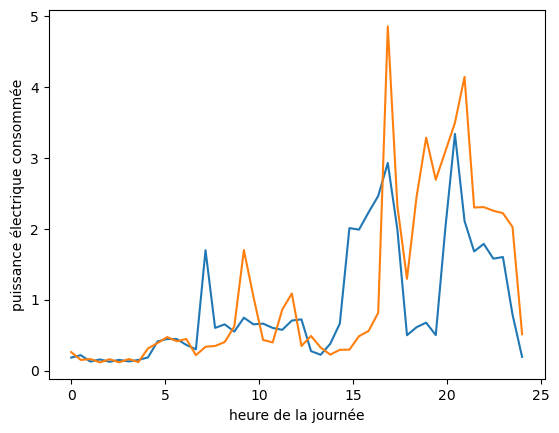

In [19]:
y_test = []
y_predict = []

for id in tqdm(client_challenges):
    y_test.append(np.array(load_signal(id_client,max_date-n_days*day,max_date)))
    y_predict.append(np.array(load_signal(id_client,max_date-(n_days+1)*day,max_date-1*day)))

y_test = np.array(y_test)
y_predict = np.array(y_predict)

print(MSE(y_test,y_predict))
print(MSE_1821(y_test,y_predict))
print(MSE_813(y_test,y_predict))


plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-31*day,max_date-30*day)))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(31+1)*day,max_date-(30+1)*day)))
plt.xlabel('heure de la journée')
plt.ylabel('puissance électrique consommée')

Tendance année globale + tendance individuelle

  0%|          | 0/307 [00:00<?, ?it/s]

100%|██████████| 307/307 [00:09<00:00, 32.17it/s]


0.35247460814322285
0.509778002694164
0.47249006536511007
0.3475812990281192
0.45915904827119086
0.43987930684827103
0.3475812990281192


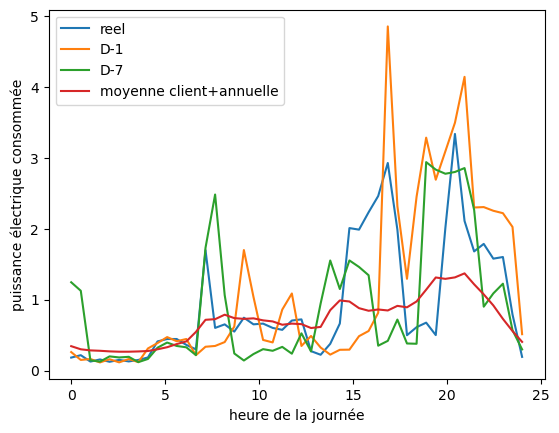

0.8823738977963415
0.7557797061245185
0.4684314819040593


In [24]:
def repeat(n,l):
    new_l = []
    for elt in l:
        for i in range(n):
            new_l.append(elt)
    return new_l

start_date = min_date
y_predict = []
y_test = []
for client in tqdm(client_challenges):
    X_signal = np.array(load_signal(client,start_date,start_date+365*day)) - repeat(48,mean_electricity)

    X_signal = X_signal.reshape(-1,48)
    meanX_signal = X_signal.mean(axis=0)
   

    y_testyear = np.array(load_signal(client,min_date+365*day,max_date))
    for id_day in range(n_days):
        y_predict.append(meanX_signal+mean_electricity[id_day])
        y_test.append(y_testyear[48*id_day:48*(id_day+1)])


y_test = np.array(y_test)
y_predict = np.array(y_predict)

print(MSE(y_test,y_predict))
print(MSE_1821(y_test,y_predict))
print(MSE_813(y_test,y_predict))

print(MAE(y_test,y_predict))
print(MAE_1821(y_test,y_predict))
print(MAE_813(y_test,y_predict))

plt.plot(np.linspace(0,24,48),y_test[n_days-31],label='reel')
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(31+1)*day,max_date-(30+1)*day)),label='D-1')

plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(31+7)*day,max_date-(30+7)*day)),label='D-7')

plt.plot(np.linspace(0,24,48),y_predict[n_days-31],label='moyenne client+annuelle')
plt.xlabel('heure de la journée')
plt.ylabel('puissance électrique consommée')
plt.legend()
plt.show()

print(MSE(y_test[n_days-31],np.array(load_signal(id_client,max_date-(31+1)*day,max_date-(30+1)*day))))
print(MSE(y_test[n_days-31],np.array(load_signal(id_client,max_date-(31+7)*day,max_date-(30+7)*day))))
print(MSE(y_test[n_days-31],y_predict[n_days-31]))


In [21]:
print(id_client)
print(max_date-30*day)

3745
2010-12-02 00:00:00
